In [2]:
import tensorflow as tf

In [3]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import os
import numpy as np
import matplotlib.pyplot as plt

SEED = 42
np.random.seed(SEED)

from pathlib import Path

In [4]:
path = "/home/rafael/Datasets/chest_xray/chest_xray"
train_dir = os.path.join(path, 'train')
test_dir = os.path.join(path, 'test')

In [5]:
train_normal_dir = os.path.join(train_dir, 'NORMAL')
train_pneumo_dir = os.path.join(train_dir, 'PNEUMONIA')

test_normal_dir = os.path.join(test_dir, 'NORMAL')
teste_pneumo_dir = os.path.join(test_dir, 'PNEUMONIA')

In [6]:
num_normal_tr = len(os.listdir(train_normal_dir))
num_pneumo_tr = len(os.listdir(train_pneumo_dir))

num_normal_ts = len(os.listdir(test_normal_dir))
num_pneumo_ts = len(os.listdir(teste_pneumo_dir))

total_train = num_normal_tr + num_pneumo_tr
total_test = num_normal_ts + num_pneumo_ts

In [7]:
print('Total de treino normal: ', num_normal_tr)
print('Total de treino pneumo: ', num_pneumo_tr)

print('Total de teste normal: ', num_normal_ts)
print('Total de teste pneumo: ', num_pneumo_ts)

print('Total de treino: ', total_train)
print('Total de teste: ', total_test)

Total de treino normal:  1342
Total de treino pneumo:  3876
Total de teste normal:  234
Total de teste pneumo:  390
Total de treino:  5218
Total de teste:  624


In [8]:
train_image_generator = ImageDataGenerator(rescale=1./255)
test_image_generator = ImageDataGenerator(rescale=1./255)

In [9]:
batch_size = 128
epochs = 20
IMG_HEIGHT = 150
IMG_WIDTH = 150

In [10]:
train_data_gen = train_image_generator.flow_from_directory(batch_size=batch_size,
                                                          directory=train_dir,
                                                          shuffle=True,
                                                          target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                          class_mode='binary')

Found 5216 images belonging to 2 classes.


In [11]:
test_data_gen = test_image_generator.flow_from_directory(batch_size=batch_size,
                                                          directory=test_dir,
                                                          target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                          class_mode='binary')

Found 624 images belonging to 2 classes.


In [12]:
sample_training_images, _ = next(train_data_gen)

In [13]:
def plotImage(images_arr):
    fig, axes = plt.subplots(1,5, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip(images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

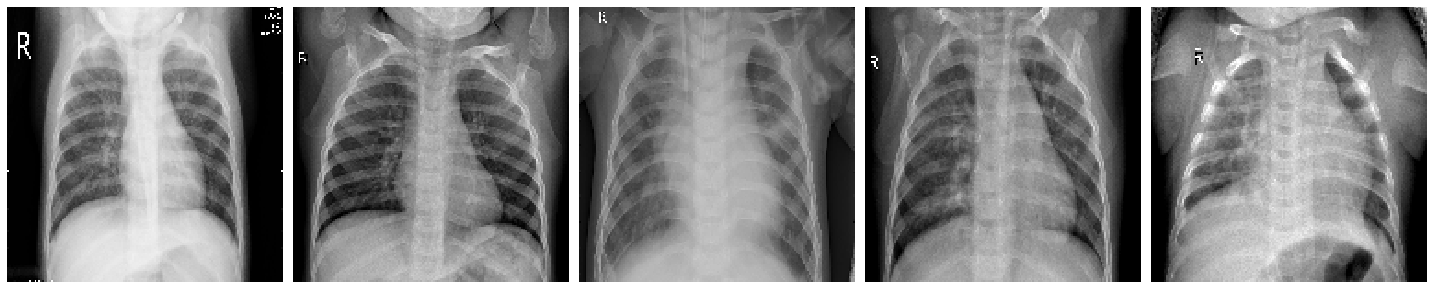

In [13]:
plotImage(sample_training_images[:5])

In [14]:
def pltGrafico(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']

    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs_range = range(epochs)

    plt.figure(figsize=(8,8))
    plt.subplot(1,2,1)
    plt.plot(epochs_range, acc, label='acuracia treinamento')
    plt.plot(epochs_range, val_acc, label='acuracia teste')
    plt.legend(loc='lower right')
    plt.title('Acuracia de treinamento e validação')

    plt.subplot(1,2,2)
    plt.plot(epochs_range, loss, label='loss treinamento')
    plt.plot(epochs_range, val_loss, label='loss teste')
    plt.legend(loc='lower right')
    plt.title('Loss de treinamento e validação')
    plt.show()

In [13]:
model = Sequential([
    Conv2D(16,3,padding='same', activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH,3)),
    MaxPooling2D(),
    Conv2D(32,3,padding='same', activation='relu'),
    MaxPooling2D(),
    Conv2D(64,3,padding='same', activation='relu'),
    MaxPooling2D(),
    Flatten(),
    Dense(512,activation='relu'),
    Dense(1)
])

In [14]:
model.compile(optimizer='adam',
             loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
             metrics=['accuracy'])

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 150, 150, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 75, 75, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 75, 75, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 37, 37, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 37, 37, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 18, 18, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 20736)             0

In [16]:
history = model.fit(
train_data_gen,
steps_per_epoch=total_train // batch_size,
epochs=epochs,
validation_data=test_data_gen,
validation_steps=total_test // batch_size
)

40/40 [==============================] - 256s 6s/step - loss: 0.4880 - accuracy: 0.7791 - val_loss: 0.5157 - val_accuracy: 0.8125


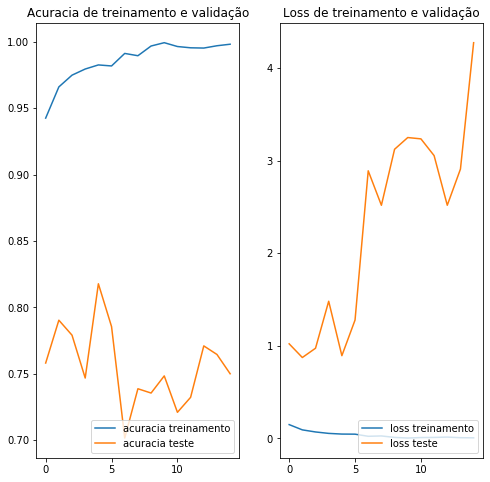

In [117]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(epochs_range, acc, label='acuracia treinamento')
plt.plot(epochs_range, val_acc, label='acuracia teste')
plt.legend(loc='lower right')
plt.title('Acuracia de treinamento e validação')

plt.subplot(1,2,2)
plt.plot(epochs_range, loss, label='loss treinamento')
plt.plot(epochs_range, val_loss, label='loss teste')
plt.legend(loc='lower right')
plt.title('Loss de treinamento e validação')
plt.show()

In [13]:
modelo_dropout = Sequential([
    Conv2D(16,3,padding='same', activation='relu',
          input_shape=(IMG_HEIGHT, IMG_WIDTH, 3)),
    MaxPooling2D(),
    Dropout(0.2),
    Conv2D(32,3,padding='same', activation='relu'),
    MaxPooling2D(),
    Conv2D(64,3,padding='same', activation='relu'),
    MaxPooling2D(),
    Dropout(0.2),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(1)
])

In [14]:
modelo_dropout.compile(optimizer='adam',
                      loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
                       metrics=['accuracy']
                      )
modelo_dropout.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 150, 150, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 75, 75, 16)        0         
_________________________________________________________________
dropout (Dropout)            (None, 75, 75, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 75, 75, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 37, 37, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 37, 37, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 18, 18, 64)        0

In [15]:
history = modelo_dropout.fit(
train_data_gen,
steps_per_epoch=total_train // batch_size,
epochs=epochs,
validation_data=test_data_gen,
validation_steps=total_test // batch_size
)

Epoch 1/5
40/40 [==============================] - 276s 7s/step - loss: 0.7226 - accuracy: 0.7667 - val_loss: 0.3961 - val_accuracy: 0.8574
Epoch 2/5
40/40 [==============================] - 272s 7s/step - loss: 0.1693 - accuracy: 0.9330 - val_loss: 0.5624 - val_accuracy: 0.7852
Epoch 3/5
40/40 [==============================] - 274s 7s/step - loss: 0.1003 - accuracy: 0.9597 - val_loss: 0.8029 - val_accuracy: 0.7480
Epoch 4/5
40/40 [==============================] - 273s 7s/step - loss: 0.0865 - accuracy: 0.9664 - val_loss: 0.8026 - val_accuracy: 0.7754
Epoch 5/5
40/40 [==============================] - 277s 7s/step - loss: 0.0804 - accuracy: 0.9676 - val_loss: 0.7424 - val_accuracy: 0.7871


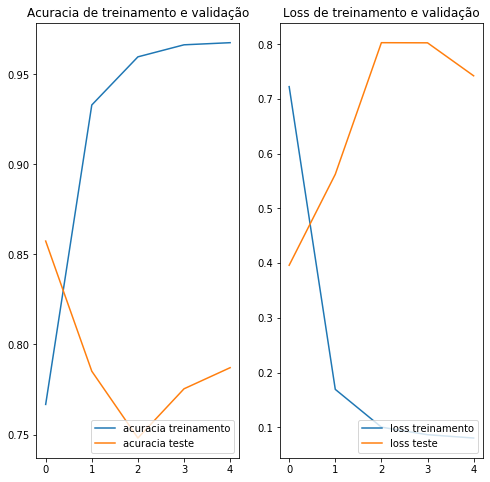

In [16]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(epochs_range, acc, label='acuracia treinamento')
plt.plot(epochs_range, val_acc, label='acuracia teste')
plt.legend(loc='lower right')
plt.title('Acuracia de treinamento e validação')

plt.subplot(1,2,2)
plt.plot(epochs_range, loss, label='loss treinamento')
plt.plot(epochs_range, val_loss, label='loss teste')
plt.legend(loc='lower right')
plt.title('Loss de treinamento e validação')
plt.show()

In [11]:
image_gen = ImageDataGenerator(rescale=1./255, horizontal_flip=True)

In [14]:
train_data_gen = image_gen.flow_from_directory(batch_size=batch_size,
                                              directory=train_dir,
                                              shuffle=True,
                                              target_size=(IMG_HEIGHT, IMG_WIDTH))

Found 5216 images belonging to 2 classes.


In [16]:
image_gen = ImageDataGenerator(rescale=1./255, rotation_range=45)

In [17]:
train_data_gen = image_gen.flow_from_directory(batch_size=batch_size,
                                              directory=train_dir,
                                              shuffle=True,
                                              target_size=(IMG_HEIGHT, IMG_WIDTH))

Found 5216 images belonging to 2 classes.


In [18]:
image_gen = ImageDataGenerator(rescale=1./255, zoom_range=0.5)

In [19]:
train_data_gen = image_gen.flow_from_directory(batch_size=batch_size,
                                              directory=train_dir,
                                              shuffle=True,
                                              target_size=(IMG_HEIGHT, IMG_WIDTH))

Found 5216 images belonging to 2 classes.


In [20]:
image_gen_train = ImageDataGenerator(
    rescale=1./255,
    rotation_range=45,
    width_shift_range=.15,
    height_shift_range=.15,
    horizontal_flip=True,
    zoom_range=0.5
)

In [21]:
train_data_gen = image_gen.flow_from_directory(batch_size=batch_size,
                                              directory=train_dir,
                                              shuffle=True,
                                              target_size=(IMG_HEIGHT, IMG_WIDTH),
                                              class_mode='binary')

Found 5216 images belonging to 2 classes.


In [23]:
image_gen_test = ImageDataGenerator(rescale=1./255)

In [24]:
test_data_gen = image_gen.flow_from_directory(batch_size=batch_size,
                                              directory=test_dir,
                                              target_size=(IMG_HEIGHT, IMG_WIDTH),
                                              class_mode='binary')

Found 624 images belonging to 2 classes.


In [27]:
modelo_rotacoes = Sequential([
    Conv2D(16,3,padding='same', activation='relu',
          input_shape=(IMG_HEIGHT, IMG_WIDTH, 3)),
    MaxPooling2D(),
    Dropout(0.2),
    Conv2D(32,3,padding='same', activation='relu'),
    MaxPooling2D(),
    Conv2D(64,3,padding='same', activation='relu'),
    MaxPooling2D(),
    Dropout(0.2),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(1)
])

In [28]:
modelo_rotacoes.compile(optimizer='adam',
                      loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
                       metrics=['accuracy']
                      )
modelo_rotacoes.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 150, 150, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 75, 75, 16)        0         
_________________________________________________________________
dropout (Dropout)            (None, 75, 75, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 75, 75, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 37, 37, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 37, 37, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 18, 18, 64)        0

In [29]:
history = modelo_rotacoes.fit(
train_data_gen,
steps_per_epoch=total_train // batch_size,
epochs=epochs,
validation_data=test_data_gen,
validation_steps=total_test // batch_size
)

Epoch 1/5
40/40 [==============================] - 297s 7s/step - loss: 0.8894 - accuracy: 0.6562 - val_loss: 0.6624 - val_accuracy: 0.3984
Epoch 2/5
40/40 [==============================] - 346s 9s/step - loss: 0.5019 - accuracy: 0.7836 - val_loss: 0.6780 - val_accuracy: 0.6602
Epoch 3/5
40/40 [==============================] - 320s 8s/step - loss: 0.3884 - accuracy: 0.8223 - val_loss: 0.6335 - val_accuracy: 0.7031
Epoch 4/5
40/40 [==============================] - 319s 8s/step - loss: 0.3165 - accuracy: 0.8618 - val_loss: 0.7267 - val_accuracy: 0.7109
Epoch 5/5
40/40 [==============================] - 327s 8s/step - loss: 0.2858 - accuracy: 0.8776 - val_loss: 0.6270 - val_accuracy: 0.7559


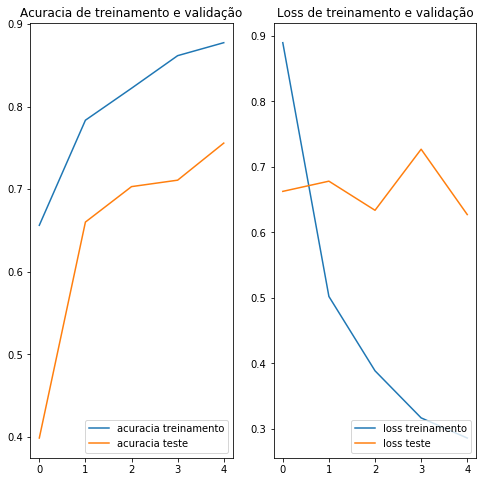

In [30]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(epochs_range, acc, label='acuracia treinamento')
plt.plot(epochs_range, val_acc, label='acuracia teste')
plt.legend(loc='lower right')
plt.title('Acuracia de treinamento e validação')

plt.subplot(1,2,2)
plt.plot(epochs_range, loss, label='loss treinamento')
plt.plot(epochs_range, val_loss, label='loss teste')
plt.legend(loc='lower right')
plt.title('Loss de treinamento e validação')
plt.show()

In [15]:
from keras.applications import VGG16
from keras.models import Model

IMAGE_SIZE = [64, 64]

vgg = VGG16(input_shape = IMAGE_SIZE + [3], weights = 'imagenet', include_top = False)

for layer in vgg.layers:
    layer.trainable = False


x = Flatten()(vgg.output)
x = Dense(2, activation='softmax')(x)
model_vgg = Model(inputs = vgg.input, outputs = x)
model_vgg.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [16]:
model_vgg.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 64, 64, 3)]       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 64, 64, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 64, 64, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 32, 32, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 32, 32, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 32, 32, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 16, 16, 128)       0     

In [17]:
from keras.applications.vgg16 import preprocess_input

training_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    preprocessing_function=preprocess_input
)

test_datagen = ImageDataGenerator(rescale=1./255,preprocessing_function=preprocess_input)

train_generator = training_datagen.flow_from_directory(batch_size=batch_size,
                                                          directory=train_dir,
                                                          target_size=IMAGE_SIZE,
                                                          class_mode='categorical')
test_generator = training_datagen.flow_from_directory(batch_size=batch_size,
                                                          directory=test_dir,
                                                          target_size=IMAGE_SIZE,
                                                          class_mode='categorical')


Found 5216 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


In [18]:
train_generator.class_indices

{'NORMAL': 0, 'PNEUMONIA': 1}

In [20]:
history = model_vgg.fit(train_generator,
                       steps_per_epoch=total_train // batch_size,
                       epochs=epochs,
                       validation_data=test_generator,
                       validation_steps=total_test // batch_size
                       )

Epoch 1/20
40/40 [==============================] - 530s 13s/step - loss: 0.3782 - accuracy: 0.8365 - val_loss: 0.5485 - val_accuracy: 0.7344
Epoch 2/20
40/40 [==============================] - 539s 13s/step - loss: 0.2608 - accuracy: 0.8933 - val_loss: 0.4732 - val_accuracy: 0.7930
Epoch 3/20
40/40 [==============================] - 546s 14s/step - loss: 0.2279 - accuracy: 0.9133 - val_loss: 0.4523 - val_accuracy: 0.8027
Epoch 4/20
40/40 [==============================] - 545s 14s/step - loss: 0.2151 - accuracy: 0.9162 - val_loss: 0.4725 - val_accuracy: 0.8145
Epoch 5/20
40/40 [==============================] - 553s 14s/step - loss: 0.2049 - accuracy: 0.9210 - val_loss: 0.4341 - val_accuracy: 0.8379
Epoch 6/20
40/40 [==============================] - 550s 14s/step - loss: 0.1937 - accuracy: 0.9269 - val_loss: 0.4984 - val_accuracy: 0.8203
Epoch 7/20
40/40 [==============================] - 544s 14s/step - loss: 0.1916 - accuracy: 0.9243 - val_loss: 0.4301 - val_accuracy: 0.8379
Epoch 

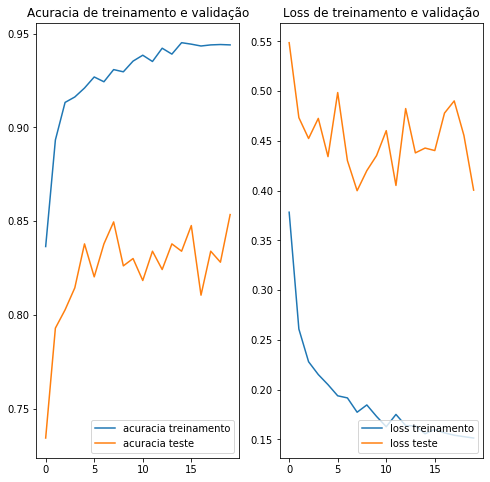

In [21]:
pltGrafico(history)